# Cleaning db

In [192]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [39]:
pd.options.display.max_columns = 100

In [86]:
df = pd.read_csv('encuesta.csv')
zat = pd.read_csv('zat.csv', sep=";")

In [87]:
del df['FACTOR_AJUSTE']
del df['FACTOR_AJUSTE_TRANSMILENIO']
del df['PI_K_I']
del df['PI_K_II']
del df['PI_K_III']
del df['FE_TOTAL']
del df['PONDERADOR_CALIBRADO_VIAJES']
del df['PONDERADOR_CALIBRADO']

In [88]:
zat[:1]

,Geo Point,Geo Shape,y_coord,Zona_Num_N,id,x_coord,AREA
0,"4.15933500918, -74.3928242522","{""type"": ""Polygon"", ""coordinates"": [[[-74.2097...",4.159335,800,6,-74.392824,1821.94


In [89]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN


In [90]:
df = df.merge(zat, left_on='ZAT_ORIGEN', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_org', 'x_coord': 'x_coord_org'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

df = df.merge(zat, left_on='ZAT_DESTINO', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_dest', 'x_coord': 'x_coord_dest'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

In [91]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238,566,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [42]:
df.MUNICIPIO_DESTINO.value_counts()

BOGOTA-DC 11001                  85557
SOACHA-cundinamarca 25754         7379
FACATATIVA-cundinamarca 25269     6583
CHIA-cundinamarca 25175           6322
ZIPAQUIRA-cundinamarca 25899      6145
FUNZA-cundinamarca 25286          3614
TOCANCIPA-cundinamarca 25817      3345
MOSQUERA-cundinamarca 25473       3255
MADRID-cundinamarca 25430         3246
COTA-cundinamarca 25214           2957
CAJICA-cundinamarca 25126         2626
SOPO-cundinamarca 25758           2564
LA CALERA 25377                   2376
BOJACA-cundinamarca 25099         2337
GACHANCIPA-cundinamarca 25295     2273
SIBATE-cundinamarca 25740         1992
TENJO-cundinamarca 25799          1873
TABIO-cundinamarca 25785          1685
Otro                              1122
Name: MUNICIPIO_DESTINO, dtype: int64

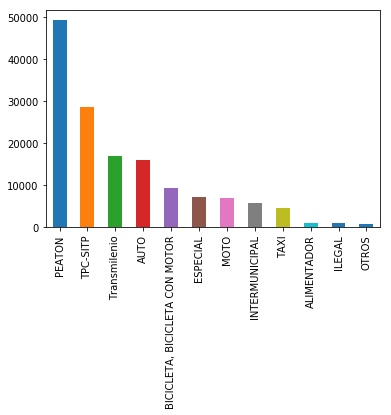

In [15]:
df.MEDIO_PREDOMINANTE.value_counts(dropna=False, normalize=False).plot(kind='bar')

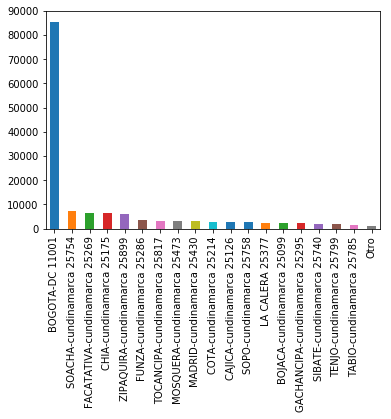

In [16]:
df.MUNICIPIO_ORIGEN.value_counts().plot(kind='bar')

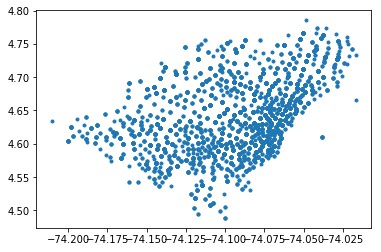

In [93]:
plt.plot(df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'x_coord_org'], df.loc[(df.MUNICIPIO_ORIGEN.str.contains("BOGOTA") == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'y_coord_org'], '.')


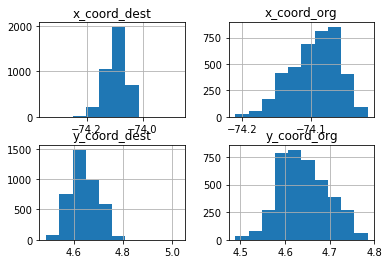

In [99]:
df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), ['x_coord_org','y_coord_org','x_coord_dest','y_coord_dest']].hist();

In [100]:
df.to_csv('./encuesta_corregida.csv')

---

# Distribution

In [113]:
import seaborn as sns

In [101]:
df = pd.read_csv('encuesta_corregida.csv')
df.loc[:,'HORA_FIN'] = pd.to_datetime(df.HORA_FIN, format="%H:%M:%S")
df.loc[:,'HORA_INICIO'] = pd.to_datetime(df.HORA_INICIO, format="%H:%M:%S")

In [102]:
df[:1]

,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [105]:
df.MEDIO_PREDOMINANTE.unique()

array(['TPC-SITP', 'PEATON', 'Transmilenio', 'ESPECIAL', 'AUTO', 'MOTO',
       'TAXI', 'BICICLETA, BICICLETA CON MOTOR', 'OTROS', 'ILEGAL',
       'ALIMENTADOR', 'INTERMUNICIPAL'], dtype=object)

In [108]:
df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]

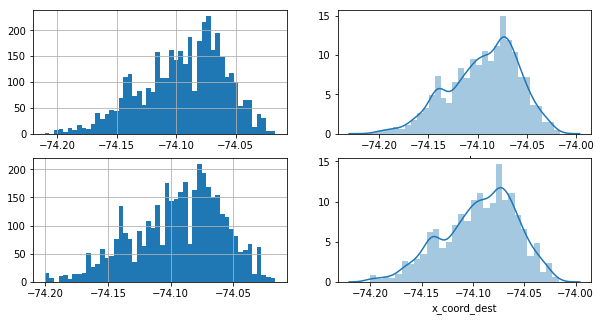

In [154]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.x_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.x_coord_org, ax=axs[0,1])

df.x_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.x_coord_dest, ax=axs[1,1])

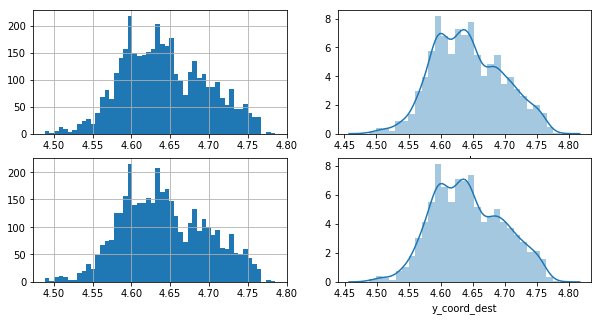

In [155]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.y_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.y_coord_org, ax=axs[0,1])

df.y_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.y_coord_dest, ax=axs[1,1]);

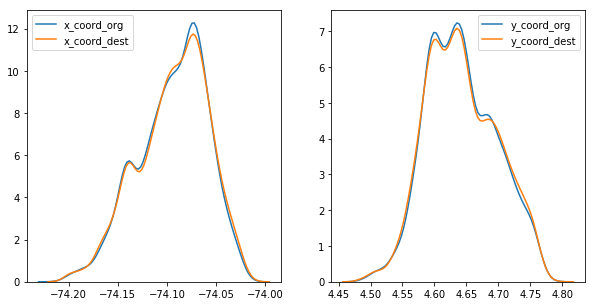

In [158]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

sns.kdeplot(df.x_coord_org, ax=axs[0])
sns.kdeplot(df.x_coord_dest, ax=axs[0])

sns.kdeplot(df.y_coord_org, ax=axs[1])
sns.kdeplot(df.y_coord_dest, ax=axs[1]);

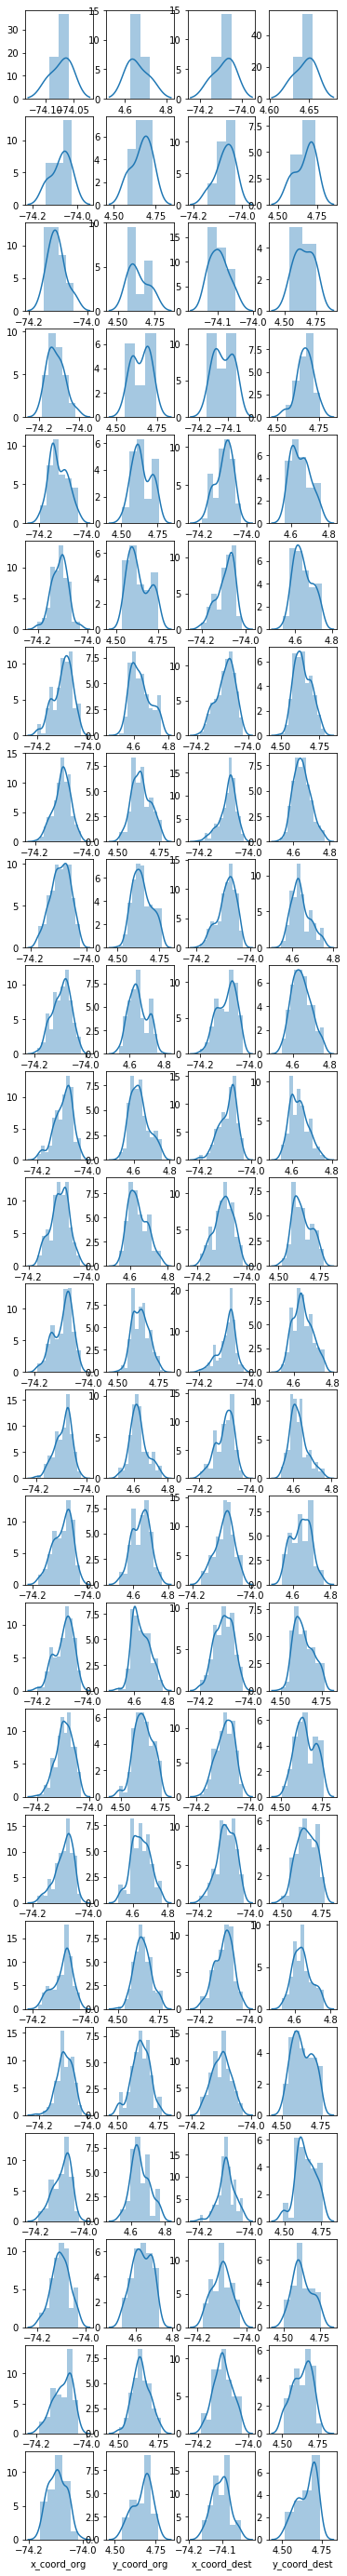

In [207]:
fig, axs = plt.subplots(24,4)
fig.set_figheight(50)

for i in range(24):
    sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'], ax=axs[i,0])
    sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'y_coord_org'], ax=axs[i,1])
    sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_dest'], ax=axs[i,2])
    sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'y_coord_dest'], ax=axs[i,3])

In [236]:
for i in range(24):
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'y_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'x_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_dest/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'y_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_dest/'+str(i)+'.png')
    plt.clf();